<a href="https://colab.research.google.com/github/TimKraemer1/2021-Stanford-TreeHacks-Project/blob/main/ActualHackathonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all necessary items

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['vader_lexicon'])

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Import all dataframes

In [ ]:
tweet_data = pd.read_csv('Tweet.csv',  index_col=0)
AAPL_stock = pd.read_csv('AAPL_Historical_Data.csv')
AMZN_stock = pd.read_csv('AMZN_Historical_Data.csv')
GOOGL_stock = pd.read_csv('GOOGL_Historical_Data.csv')
TSLA_stock = pd.read_csv('TSLA_Historical_Data.csv')
company_tweet_data = pd.read_csv('Company_Tweet.csv')
sentimental_tweets = pd.read_csv('Sentimental_Tweets.csv', index_col=0)

FileNotFoundError: ignored

In [ ]:
x = tweet_data.like_num
y = tweet_data.retweet_num
score = (((x+1)/1000)+((y+1)/1000))/2

In [ ]:
sentimental_tweets_ = pd.DataFrame(
    {
        'Date': sentimental_tweets.Date, 
        'Positive': sentimental_tweets.Positive*score, 
        'Negative': sentimental_tweets.Negative*score,
        'Neutral': sentimental_tweets.Neutral*score,
        'Compound': sentimental_tweets.Compound*score
    })

In [ ]:
sentimental_tweets_ = sentimental_tweets_[sentimental_tweets_.Compound!=0]

Specify Company, and Slice All Tweets to only get Tweets about specified company

In [ ]:
company = 'AAPL'
tweets_from_company = company_tweet_data[company_tweet_data.ticker_symbol==company].tweet_id
TA = tweet_data.loc[tweets_from_company]

Specify the date, Slice Specified Company Tweet Data to only have tweets in the specified date range

In [ ]:
day1 = '04/29/2019'
day2 = '05/28/2019'

date1 = pd.to_datetime(day1)
date2 = pd.to_datetime(day2)

TA1 = TA[pd.to_datetime(TA.post_date*1e9, origin='unix') > date1]
TA2 = TA1[pd.to_datetime(TA1.post_date*1e9, origin='unix') < date2]

Gets the index(Tweet ID) for the specified tweets

In [ ]:
tweets_in_window = list(set(TA2.index) & set(sentimental_tweets_.index))

Get the sentimental data from the sentimental data frame for the specified tweets and sort the values by date

In [ ]:
S = sentimental_tweets_.loc[tweets_in_window]
S = S.sort_values(by='Date')

Example of Sentiment Analysis

In [ ]:
SIA = SentimentIntensityAnalyzer()
SIA.polarity_scores('I like you')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [ ]:
SIA.polarity_scores('I hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

Plot the Compound of the Sentiments over time

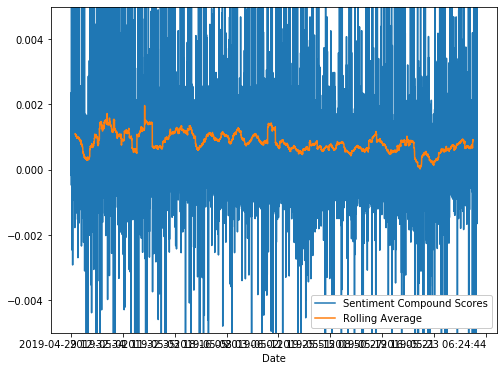

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
S.set_index('Date').Compound.plot(label='Sentiment Compound Scores')
S.set_index('Date').Compound.rolling(300, center=True).mean().plot(label='Rolling Average')
S1 = S.set_index('Date')
plt.ylim([-0.005, 0.005])
plt.legend(framealpha=1, frameon=True)

The mean Compound score

In [ ]:
Sc = S.Compound

In [ ]:
Sc[Sc!=0].mean()

0.0008410047249872222

Display Company Stock Chart

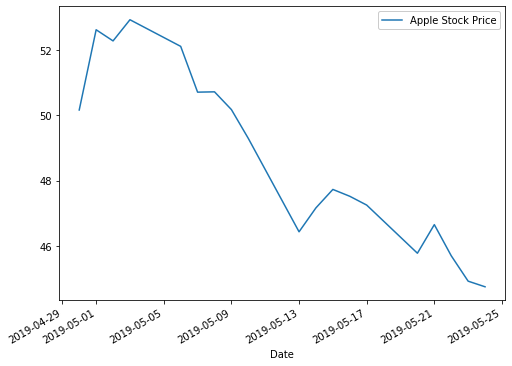

In [ ]:
if company == 'AAPL':
    apple_stock_dates = pd.to_datetime(AAPL_stock.Date)
    apple_stock_prices = pd.Series([float(s[2:]) for s in AAPL_stock[' Close/Last']], index=apple_stock_dates)

    TA1 = apple_stock_prices[day1<apple_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot(label='Apple Stock Price')
    plt.legend(framealpha=1, frameon=True)

if company == 'TSLA':
    tesla_stock_dates = pd.to_datetime(TSLA_stock.Date)
    tesla_stock_prices = pd.Series([float(s[2:]) for s in TSLA_stock[' Close/Last']], index=tesla_stock_dates)

    TA1 = tesla_stock_prices[day1<tesla_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot(label='Tesla Stock Price')
    plt.legend(framealpha=1, frameon=True)

if company == 'AMZN':
    amazon_stock_dates = pd.to_datetime(AMZN_stock.Date)
    amazon_stock_prices = pd.Series([float(s[2:]) for s in AMZN_stock[' Close/Last']], index=amazon_stock_dates)

    TA1 = amazon_stock_prices[day1<amazon_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot(label='Amazon Stock Price')
    plt.legend(framealpha=1, frameon=True)
              
if company == 'GOOGL':
    google_stock_dates = pd.to_datetime(GOOGL_stock.Date)
    google_stock_prices = pd.Series([float(s[2:]) for s in GOOGL_stock[' Close/Last']], index=google_stock_dates)

    TA1 = google_stock_prices[day1<google_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot(label='Google Stock Price')
    plt.legend(framealpha=1, frameon=True)
    

Display Positive Score and Negative Score

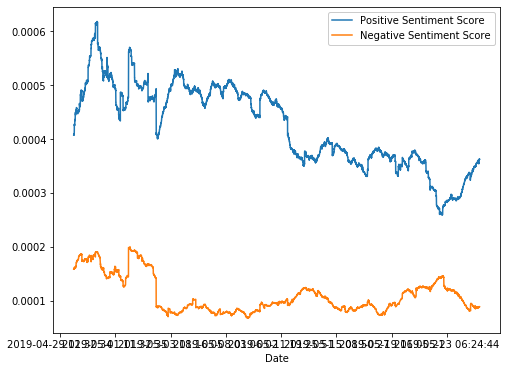

In [ ]:
S1.Positive.rolling(1000, center=True).mean().plot(label='Positive Sentiment Score')
S1.Negative.rolling(1000, center=True).mean().plot(label='Negative Sentiment Score')
plt.legend(framealpha=1, frameon=True)
#S1.Compound.rolling(10000, center=True).mean().plot()

Display Positive vs. Negative

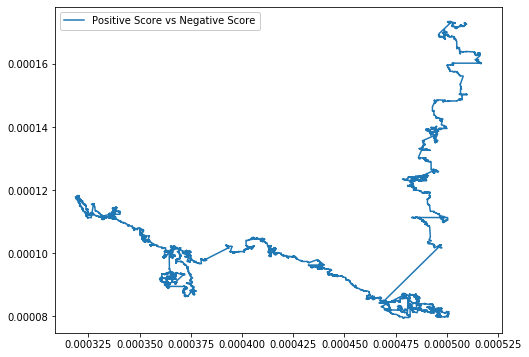

In [ ]:
plt.plot(S1.Positive.rolling(3000, center=True).mean(), S1.Negative.rolling(3000, center=True).mean(), label='Positive Score vs Negative Score')
plt.legend(framealpha=1, frameon=True)